In [ ]:
# !pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt


import plotly.express as px
import plotly.graph_objects as go


import itertools

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

#import warnings
#warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Monografia/datos_normalizados/data_normalize.csv', sep=",")

In [ ]:
df['date']=pd.to_datetime(df['date'], errors = "coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          96 non-null     datetime64[ns]
 1   ndvi                          96 non-null     float64       
 2   precipitation                 96 non-null     float64       
 3   real_evapotranspiration       96 non-null     float64       
 4   interception                  96 non-null     float64       
 5   potential_evapotranspiration  96 non-null     float64       
 6   soil_moisture                 96 non-null     float64       
 7   recharge                      96 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 6.1 KB


In [ ]:
df.head()

,date,ndvi,precipitation,real_evapotranspiration,interception,potential_evapotranspiration,soil_moisture,recharge
0,2013-01-01,0.551498,0.000000,0.138145,0.135786,0.584168,0.434685,0.000103
1,2013-02-01,0.298546,0.271296,0.137373,0.526269,0.446455,0.313876,0.014731
2,2013-03-01,0.446397,0.308156,0.335274,0.688606,0.643681,0.385454,0.022327
3,2013-04-01,0.494826,0.525013,0.621304,0.020353,0.607442,0.444698,0.118115
4,2013-05-01,0.891137,0.896439,0.669791,0.052094,0.450178,0.811397,0.775615


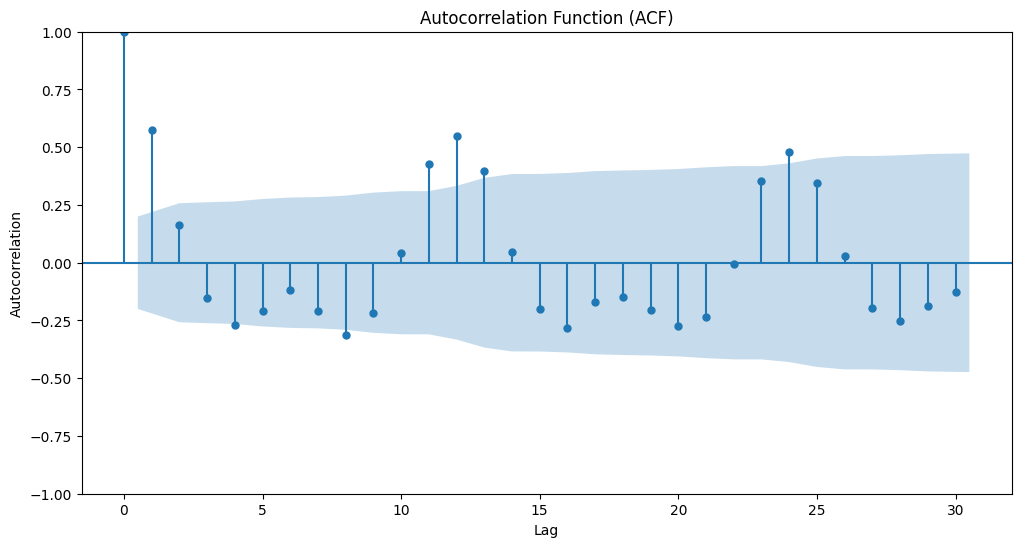

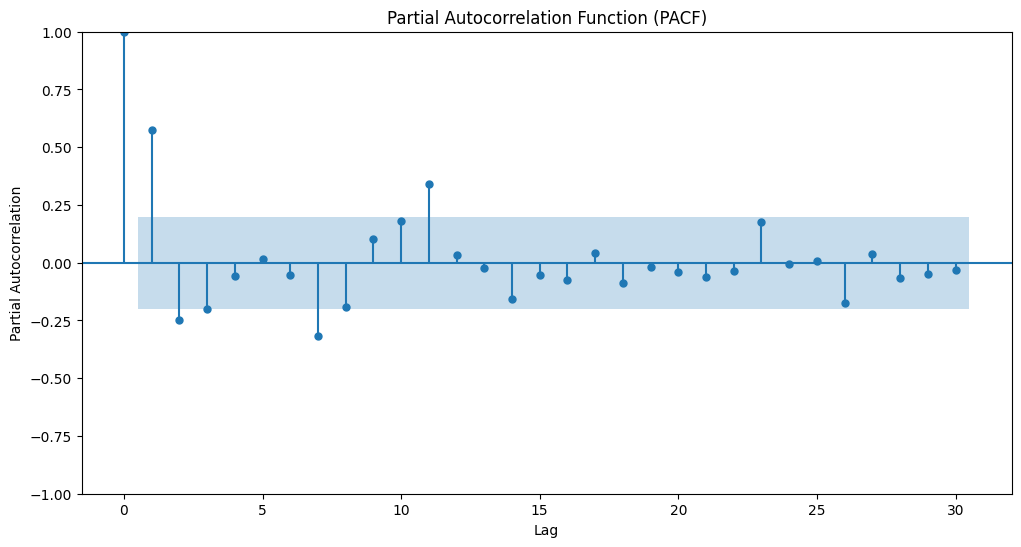

In [ ]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['ndvi'], lags=30, ax=plt.gca())  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['ndvi'], lags=30, ax=plt.gca())  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame containing the dataset
# Assuming 'ndvi' is the NDVI column in your DataFrame

# Extract the NDVI column from the DataFrame
ndvi_series = df['ndvi']

# Fit auto-ARIMA model
auto_model = auto_arima(ndvi_series, seasonal=True, trace=True)  # Set seasonal=True if your data has a seasonal component

# Print summary of the best model
print(auto_model.summary())

# Forecast with the best model (optional)
n_periods = 10  # Number of periods to forecast
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast
forecast_index = pd.date_range(start=df['date'].iloc[-1], periods=n_periods + 1, freq='M')[1:]
forecast_df = pd.DataFrame({'Forecast': forecast, 'Lower': conf_int[:, 0], 'Upper': conf_int[:, 1]}, index=forecast_index)
print(forecast_df)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-61.005, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-17.965, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-54.612, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-50.634, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=220.823, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-56.021, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-62.156, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-55.908, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-58.352, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-60.179, Time=0.38 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-60.506, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-58.244, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-28.941, Time=0.11 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.361 seconds
                               SARI

In [ ]:
forecast_df.head()

,Forecast,Lower,Upper
2021-01-31,NaN,0.421775,1.070449
2021-02-28,NaN,0.261214,1.028738
2021-03-31,NaN,0.212257,0.994877
2021-04-30,NaN,0.218229,1.002287
2021-05-31,NaN,0.244986,1.045039
